In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df=pd.read_csv('Grupo4.txt',sep=' ')
df.head()

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
4,4.6,10.16,54.2,8.4,51.5,831


In [ ]:
df[df.duplicated]

,Y,X1,X2,X3,X4,X5


In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       69 non-null     float64
 1   X1      69 non-null     float64
 2   X2      69 non-null     float64
 3   X3      69 non-null     float64
 4   X4      69 non-null     float64
 5   X5      69 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.4 KB


#PUNTO 1

In [ ]:
y=df['Y']
X=df.drop('Y', axis=1)
regresion=LinearRegression().fit(X,y)
y_pred=regresion.predict(X)
print('R2: ',r2_score(y, y_pred))
print('MSE: ',mean_squared_error(y,y_pred))
print('Intercepto: ', regresion.intercept_)
print('Coeficientes: ', regresion.coef_)

R2:  0.6235097734617928
MSE:  0.5579852440842902
Intercepto:  -0.24492747271502324
Coeficientes:  [0.18356417 0.02078503 0.06887186 0.00441703 0.00156545]


-R2 de aproximadamente 0.6235 significa que alrededor del 62.35% de la variabilidad en el riesgo de infección (Y) se explica por las variables predictoras (X1, X2, X3, X4, X5) en conjunto. Nos indica que aún hay algo de variabilidad no explicada por el modelo.

-El intercepto es aproximadamente -0.2449. Esto es el valor estimado deL riesgo de infeccion (Y) cuando todas las variables predictoras son cero. En este contexto, probablemente no tenga una interpretación significativa.

-Para Duración de la estadía (X1): Un aumento de una unidad en la duración promedio de la estadía de los pacientes en el hospital está asociado con un aumento de aproximadamente 0.1836 en el riesgo de infección, manteniendo constantes todas las demás variables.

-Para Rutina de cultivos (X2): Un aumento de una unidad en la razón del número de cultivos realizados en pacientes sin síntomas de infección hospitalaria, por cada 100, está asociado con un aumento de aproximadamente 0.0208 en el riesgo de infección, manteniendo constantes todas las demás variables.

-Para Número de camas (X3): Un aumento de una unidad en el número promedio de camas en el hospital durante el periodo del estudio está asociado con un aumento de aproximadamente 0.0689 en el riesgo de infección, manteniendo constantes todas las demás variables.

-Para Censo promedio diario (X4): Un aumento de una unidad en el número promedio de pacientes en el hospital por día durante el periodo del estudio está asociado con un aumento de aproximadamente 0.0044 en el riesgo de infección, manteniendo constantes todas las demás variables.

-Para Número de enfermeras (X5): Un aumento de una unidad en el número promedio de enfermeras, equivalentes a tiempo completo, durante el periodo del estudio está asociado con un aumento de aproximadamente 0.0016 en el riesgo de infección, manteniendo constantes todas las demás variables.

#PUNTO 2

In [ ]:
y_pred=regresion.predict(X)
df['y_pred']=y_pred
residuales=y-y_pred
df['residuales']=residuales
df.head()

,Y,X1,X2,X3,X4,X5,y_pred,residuales
0,5.0,7.78,45.5,20.9,71.6,489,4.650105,0.349895
1,2.9,8.86,51.3,9.5,87.5,100,3.645040,-0.745040
2,4.4,11.65,54.5,18.6,96.1,248,5.120103,-0.720103
3,1.8,7.67,51.7,2.5,40.4,106,2.754161,-0.954161
4,4.6,10.16,54.2,8.4,51.5,831,4.853520,-0.253520


In [ ]:
MSE=np.mean(df['residuales']**2)
print(MSE)
MSE2=sum(df['residuales']**2)/df['X1'].count()
print(MSE2)
df['standarized residuals']=df['residuales']/(MSE**0.5)
df.head()

0.5579852440842902
0.55798524408429


,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals
0,5.0,7.78,45.5,20.9,71.6,489,4.650105,0.349895,0.468410
1,2.9,8.86,51.3,9.5,87.5,100,3.645040,-0.745040,-0.997398
2,4.4,11.65,54.5,18.6,96.1,248,5.120103,-0.720103,-0.964014
3,1.8,7.67,51.7,2.5,40.4,106,2.754161,-0.954161,-1.277351
4,4.6,10.16,54.2,8.4,51.5,831,4.853520,-0.253520,-0.339391


In [ ]:
df[df['standarized residuals'].abs()>3]

,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals


NO HAY PUNTOS ATIPICOS

In [ ]:
hii=np.dot(X, np.dot(np.linalg.inv(np.dot(X.T,X)),X.T))
leverage=np.diag(hii)
df['hii']=leverage
df.head()

,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals,hii
0,5.0,7.78,45.5,20.9,71.6,489,4.650105,0.349895,0.468410,0.074491
1,2.9,8.86,51.3,9.5,87.5,100,3.645040,-0.745040,-0.997398,0.036930
2,4.4,11.65,54.5,18.6,96.1,248,5.120103,-0.720103,-0.964014,0.027676
3,1.8,7.67,51.7,2.5,40.4,106,2.754161,-0.954161,-1.277351,0.080172
4,4.6,10.16,54.2,8.4,51.5,831,4.853520,-0.253520,-0.339391,0.202882


In [ ]:
H=(2*(5+1))/(df['X1'].count())
print(H)

0.17391304347826086


In [ ]:
df[df['hii'].abs()>H]

,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals,hii
4,4.6,10.16,54.2,8.4,51.5,831,4.853520,-0.253520,-0.339391,0.202882
6,5.8,9.50,49.3,42.0,70.9,98,5.882834,-0.082834,-0.110891,0.182176
13,4.9,11.07,53.2,28.5,122.0,768,6.596880,-1.696880,-2.271641,0.228854
34,7.8,12.07,43.7,52.4,105.3,157,7.198772,0.601228,0.804874,0.254374
64,6.5,19.56,59.9,17.2,113.7,306,6.756450,-0.256450,-0.343313,0.416672


In [ ]:
X.describe() #ESTADISTICAS PARA CADA VARIABLE

,X1,X2,X3,X4,X5
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,9.808841,52.933333,16.228986,82.531884,245.985507
std,1.915082,4.254467,9.747188,20.529888,177.674644
min,6.700000,38.800000,2.500000,40.400000,29.000000
25%,8.660000,51.200000,9.500000,69.100000,119.000000
50%,9.530000,52.800000,14.100000,83.800000,190.000000
75%,10.470000,55.000000,20.500000,96.100000,304.000000
max,19.560000,65.900000,52.400000,133.500000,831.000000


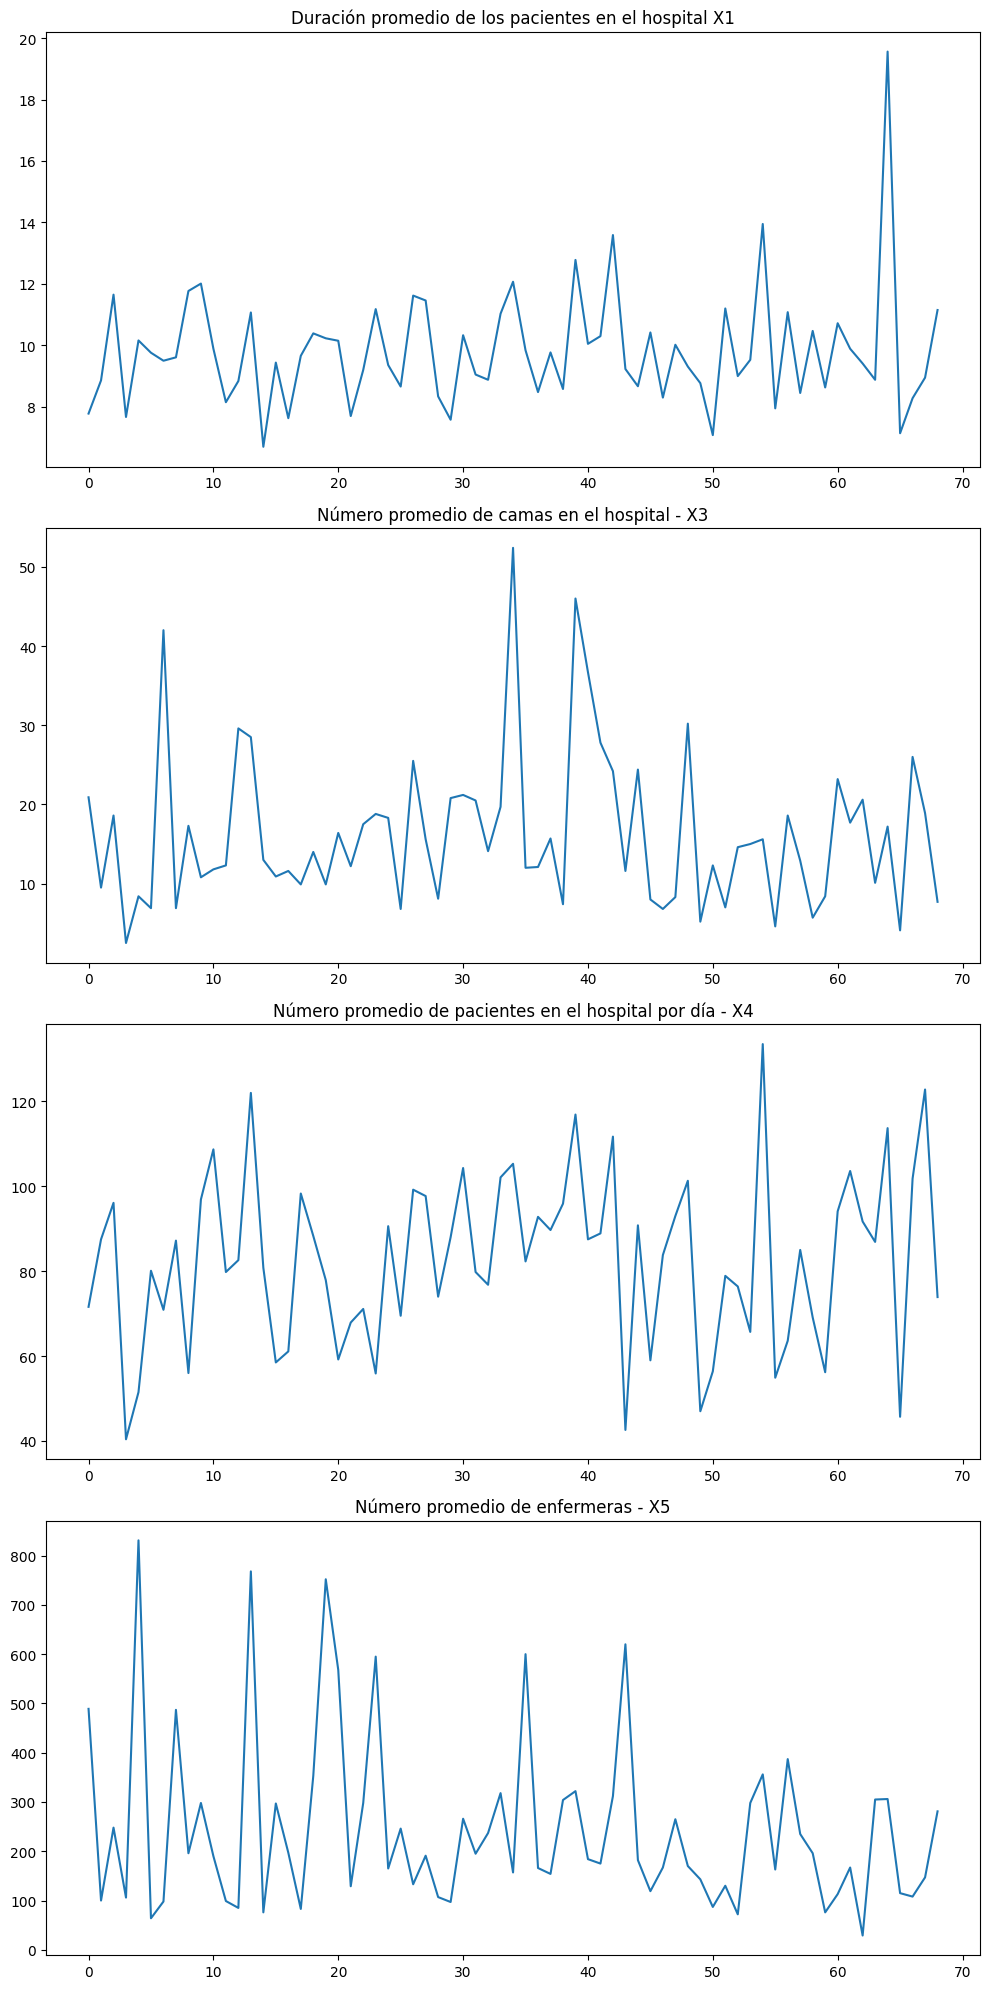

In [ ]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 20))
axes[0].plot(df['X1'])
axes[0].set_title('Duración promedio de los pacientes en el hospital X1')

axes[1].plot(df['X3'])
axes[1].set_title('Número promedio de camas en el hospital - X3')

axes[2].plot(df['X4'])
axes[2].set_title('Número promedio de pacientes en el hospital por día - X4')

axes[3].plot(df['X5'])
axes[3].set_title('Número promedio de enfermeras - X5')

plt.tight_layout()
plt.show()

Hay 5 puntos de balanceo (observaciones 4, 6, 13, 34 y 64).

El registro de la observación 64 pasó 19.56 días en el hospital (X1), una duración muy elevada teniendo en cuenta que la media es 9.8 días. Por lo tanto, se eliminará la observación 64.

Los registros 6 y 34 se refieren a una alta disponibilidad de camas promedio (X3) de 52.4 y 42.0, respectivamente, lo que no es representativo de la mayoría de los registros. Por lo tanto, se eliminarán las observaciones 6 y 34.

El registro 13, por su parte, refleja valores más altos que la media de la muestra para las variables número de pacientes promedio (X4) y número promedio de enfermeras (X5). Por lo tanto, se eliminará la observación 13.

El registro 4 posee el número promedio más alto de enfermeras (X5), con un valor de 831.0 cuando la media es de 245.0. Por lo tanto, se eliminará la observación 4.



In [ ]:
cooks_distance = infl.cooks_distance
cooks_distance

(array([2.94660725e-03, 7.56891880e-03, 4.93950490e-03, 2.97322625e-02,
        6.70459867e-03, 1.75617816e-02, 7.80616567e-04, 1.84736058e-03,
        1.19956725e-02, 2.23824367e-04, 9.38052211e-04, 3.40777808e-02,
        4.70907654e-02, 3.62518702e-01, 2.26944532e-02, 2.40433528e-03,
        4.43223678e-02, 5.85389186e-03, 1.25877785e-03, 1.08591894e-04,
        4.94220598e-02, 1.05713469e-02, 2.11667161e-03, 6.11120973e-03,
        6.57357270e-04, 3.59354382e-04, 1.57426684e-02, 1.13599353e-03,
        1.13656829e-02, 9.45239597e-03, 1.89567397e-04, 1.48276397e-03,
        2.96180773e-04, 2.51632349e-04, 5.02811729e-02, 8.07553428e-04,
        4.82354350e-04, 7.21289850e-03, 8.27846368e-04, 4.30463610e-03,
        6.99372805e-02, 1.97403609e-03, 2.27137246e-04, 2.04856998e-03,
        2.29342292e-03, 6.32382567e-03, 1.10228243e-02, 2.15798212e-03,
        1.26819025e-02, 5.66886854e-02, 3.88209288e-02, 2.36332018e-02,
        4.34709022e-04, 5.77055214e-03, 1.97343453e-02, 1.074467

In [ ]:
df['Cook D']=cooks_distance[0]
df.head()

,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals,hii,Cook D
0,5.0,7.78,45.5,20.9,71.6,489,4.650105,0.349895,0.468410,0.074491,0.002947
1,2.9,8.86,51.3,9.5,87.5,100,3.645040,-0.745040,-0.997398,0.036930,0.007569
2,4.4,11.65,54.5,18.6,96.1,248,5.120103,-0.720103,-0.964014,0.027676,0.004940
3,1.8,7.67,51.7,2.5,40.4,106,2.754161,-0.954161,-1.277351,0.080172,0.029732
4,4.6,10.16,54.2,8.4,51.5,831,4.853520,-0.253520,-0.339391,0.202882,0.006705


In [ ]:
df[df['Cook D'].abs()>1]

,Y,X1,X2,X3,X4,X5,y_pred,residuales,standarized residuals,hii,Cook D


NOY HAY PUNTOS INFLUYENTES PARA DISTANCIA DE COOK

In [ ]:
indices_a_eliminar = [4, 6, 13, 34, 64]

df = df.drop(indices_a_eliminar, axis=0)

df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Y                      64 non-null     float64
 1   X1                     64 non-null     float64
 2   X2                     64 non-null     float64
 3   X3                     64 non-null     float64
 4   X4                     64 non-null     float64
 5   X5                     64 non-null     int64  
 6   y_pred                 64 non-null     float64
 7   residuales             64 non-null     float64
 8   standarized residuals  64 non-null     float64
 9   hii                    64 non-null     float64
 10  Cook D                 64 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 5.6 KB


In [ ]:
y=df['Y']
X=df.drop(['Y', 'y_pred', 'residuales', 'standarized residuals', 'hii', 'Cook D'], axis=1)
regresion=LinearRegression().fit(X,y)
y_pred=regresion.predict(X)
R2=r2_score(y, y_pred)
R2A=1 - ((df['X1'].count() - 1) / (df['X1'].count() - 5 - 1)) * (1 - R2)
print('R2: ',R2)
print('R2Ajustado: ',R2A)
print('MSE: ',mean_squared_error(y,y_pred))
print('Intercepto: ', regresion.intercept_)
print('Coeficientes: ', regresion.coef_)

R2:  0.6014110806033827
R2Ajustado:  0.5670499668622949
MSE:  0.5298576017257353
Intercepto:  -0.8703374806765192
Coeficientes:  [0.15504765 0.02883779 0.06574505 0.00858334 0.00245404]


# PUNTO 3

In [ ]:
y_mean = np.mean(y)
SSR = np.sum((y_pred - y_mean) ** 2)
SSE = np.sum((y_pred - y) ** 2)

NameError: name 'np' is not defined

In [ ]:
F=(SSR/6)/(SSE/(df['Y'].count()-6-1))
F

In [ ]:
from scipy.stats import f
dfn = 6
dfd = df['X1'].count() - 6 - 1

alpha = 0.05
F_critico = f.ppf(1 - alpha, dfn, dfd)
p_value = f.sf(F, dfn, dfd)

print("Estadística de prueba F:", F)
print("Valor crítico teórico de F para alpha =", alpha, ":", F_critico)
print("Valor p asociado a la prueba F:", p_value)

H0 = β1 = β2 = β3 = β4 = β5 = 0   
Ha = al menos un βj ≠ 0 para j = 1,2,3,4,5

RR Fc > Ft  O  vp<alpha

Se rechaza la hipótesis nula, que establece que no hay relación lineal significativa entre las variables independientes y la variable dependiente en el modelo de regresión, a favor de la hipótesis alternativa, que afirma que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente.

# PUNTO 4

In [ ]:
SSR
SCT = np.sum((y - y_mean) ** 2)

In [ ]:
R2D=SSR/SCT
print('Coeficiente de Determinacion: ',R2D*100)

COeficiente de Determinacion:  60.14110806033801


In [ ]:
R2DA=(1-((SSE/(df['X1'].count()-(5+1)))/(SCT/(df['X1'].count()-1))))
print('Coeficiente de Determinacion Ajustado: ',R2DA*100)

Coeficiente de Determinacion Ajustado:  56.70499668622949


# PUNTO 5

In [ ]:
orden=[['X1', 'X2', 'X3', 'X4', 'X5'],
       ['X2', 'X3', 'X4', 'X5', 'X1'],
       ['X3', 'X4', 'X5', 'X1', 'X2'],
       ['X4', 'X5', 'X1', 'X2', 'X3'],
       ['X5', 'X1', 'X2', 'X3', 'X4']]

In [ ]:
FIV=[]

for i in orden:
  Xo=i[1:]
  yo=i[0]
  Xoo=df[Xo]
  yoo=df[f'{yo}']
  regresionm=LinearRegression().fit(Xoo,yoo)
  y_predm=regresionm.predict(Xoo)
  FIVc=1/(1-r2_score(yoo,y_predm))
  FIV.append(FIVc)

FIV

[1.6558049356541287,
 1.1000531855531532,
 1.3349244486293932,
 1.5788547419658132,
 1.219766175602475]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

XL = X[['X1', 'X2', 'X3', 'X4', 'X5']]
XL['1']=1
XL = XL[['1','X1', 'X2', 'X3', 'X4', 'X5']]

vif_data = pd.DataFrame()
vif_data["feature"] = XL.columns

vif_data["VIF"] = [variance_inflation_factor(XL.values, i)
                          for i in range(len(XL.columns))]

print(vif_data)

  feature         VIF
0       1  179.304893
1      X1    1.655805
2      X2    1.100053
3      X3    1.334924
4      X4    1.578855
5      X5    1.219766


En general, se considera que un valor de VIF inferior a 10 indica que la multicolinealidad no es un problema significativo en el modelo de regresión. Esto significa que las variables predictoras están relativamente poco correlacionadas entre sí, lo que es deseable para evitar problemas de interpretación de los coeficientes de regresión y la precisión de las predicciones.

In [ ]:
XM=X
XM=np.array(XM[['X1', 'X2', 'X3', 'X4', 'X5']])

In [ ]:
MAT=np.dot(XM.T,XM)
VPROPIOS=np.linalg.eigvals(MAT)
VPROPIOS

array([5.36246889e+06, 1.98957095e+05, 8.70451531e+01, 6.85149290e+03,
       3.04995737e+03])

In [ ]:
K=np.max(VPROPIOS)/np.min(VPROPIOS)
K

61605.60013844223

# PUNTO 6

In [ ]:
import itertools

variables = ['X1', 'X2', 'X3', 'X4', 'X5']
combinaciones = []

for r in range(1, len(variables) + 1):
    combinaciones.extend(itertools.combinations(variables, r))

combinaciones.append(tuple(variables))

combinaciones_finales = sorted(set(combinaciones))

for i in combinaciones_finales:
  print(i)

('X1',)
('X1', 'X2')
('X1', 'X2', 'X3')
('X1', 'X2', 'X3', 'X4')
('X1', 'X2', 'X3', 'X4', 'X5')
('X1', 'X2', 'X3', 'X5')
('X1', 'X2', 'X4')
('X1', 'X2', 'X4', 'X5')
('X1', 'X2', 'X5')
('X1', 'X3')
('X1', 'X3', 'X4')
('X1', 'X3', 'X4', 'X5')
('X1', 'X3', 'X5')
('X1', 'X4')
('X1', 'X4', 'X5')
('X1', 'X5')
('X2',)
('X2', 'X3')
('X2', 'X3', 'X4')
('X2', 'X3', 'X4', 'X5')
('X2', 'X3', 'X5')
('X2', 'X4')
('X2', 'X4', 'X5')
('X2', 'X5')
('X3',)
('X3', 'X4')
('X3', 'X4', 'X5')
('X3', 'X5')
('X4',)
('X4', 'X5')
('X5',)


In [ ]:
MSEmod=[]
R2_AjMod=[]
R2=[]
p=[]
n=df['X1'].count()

y=df['Y']

for i in combinaciones_finales:
  Xcom = df[list(i)]
  RegresionCom = LinearRegression().fit(Xcom, y)
  y_predCom=RegresionCom.predict(Xcom)
  pc=len(i)
  p.append(pc)
  MSEmod.append((mean_squared_error(y,y_predCom)))
  R2n=r2_score(y,y_predCom)
  R2.append(R2n)
  R2_AjMod.append((1-(((1 - R2n) * (n - 1)) / (n - pc - 1))))


In [ ]:
RESULT=pd.DataFrame()
RESULT['Modelo']=combinaciones_finales
RESULT['R2 Ajustado']=R2_AjMod
RESULT['R2']=R2
RESULT['MSE']=MSEmod
RESULT['p']=p
RESULT['n']=n

In [ ]:
RESULT

,Modelo,R2 Ajustado,R2,MSE,p,n
0,"(X1,)",0.296611,0.307776,0.920196,1,64
1,"(X1, X2)",0.287041,0.309675,0.917673,2,64
2,"(X1, X2, X3)",0.488880,0.513219,0.647094,3,64
3,"(X1, X2, X3, X4)",0.482369,0.515235,0.644415,4,64
4,"(X1, X2, X3, X4, X5)",0.567050,0.601411,0.529858,5,64
5,"(X1, X2, X3, X5)",0.560054,0.587988,0.547702,4,64
6,"(X1, X2, X4)",0.325634,0.357747,0.853768,3,64
7,"(X1, X2, X4, X5)",0.403528,0.441399,0.742567,4,64
8,"(X1, X2, X5)",0.325525,0.357643,0.853907,3,64
9,"(X1, X3)",0.492634,0.508741,0.653047,2,64


In [ ]:
RESULT.sort_values(by='MSE',ascending=True)

,Modelo,R2 Ajustado,R2,MSE,p,n
4,"(X1, X2, X3, X4, X5)",0.567050,0.601411,0.529858,5,64
11,"(X1, X3, X4, X5)",0.564123,0.591798,0.542637,4,64
5,"(X1, X2, X3, X5)",0.560054,0.587988,0.547702,4,64
12,"(X1, X3, X5)",0.557555,0.578624,0.560149,3,64
19,"(X2, X3, X4, X5)",0.548036,0.576732,0.562664,4,64
26,"(X3, X4, X5)",0.532698,0.554951,0.591619,3,64
20,"(X2, X3, X5)",0.516069,0.539113,0.612672,3,64
3,"(X1, X2, X3, X4)",0.482369,0.515235,0.644415,4,64
2,"(X1, X2, X3)",0.488880,0.513219,0.647094,3,64
10,"(X1, X3, X4)",0.486400,0.510857,0.650234,3,64
